# OpenStreetMap 結合 Python，如何找到你想要的資料

### 常用的 Python 套件與方法
slide: 
<div style="text-align: right;">OpenStreetMap台灣 - 陳瑞霖</div>

## 今日大綱

* 簡介
* 實地編輯
    * HOT Tasking Manager 學甲專案
    * Mapillary 學甲街景
* 常見套件與 API 介紹
    * Overpass API
    * OSM Nominatin
* 都市計畫用途的套件 osmnx
* osmium 處理 pbf 格式 Taiwan 圖資
* OpenStreetMap 與 Wikidata

# OpenStreetMap
* 地圖版的維基百科
* 在臺灣社群發展十年
* 自己的地圖自己畫
* tag 系統有彈性，能照顧少數需求
* 例：第三世界防災，原住民族語地圖

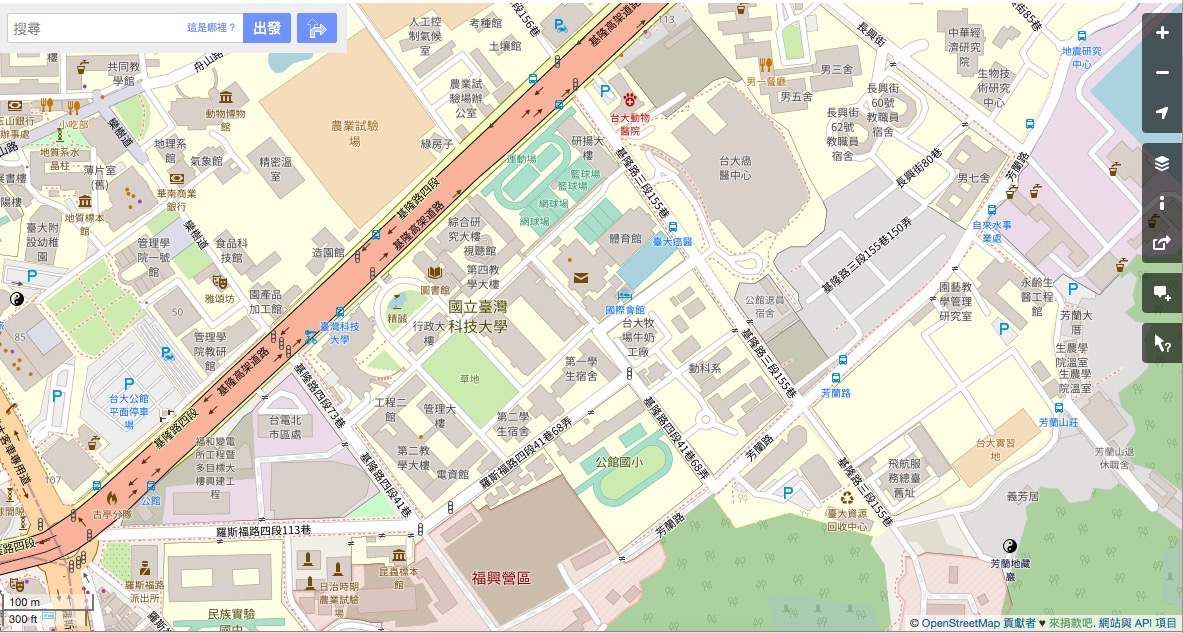

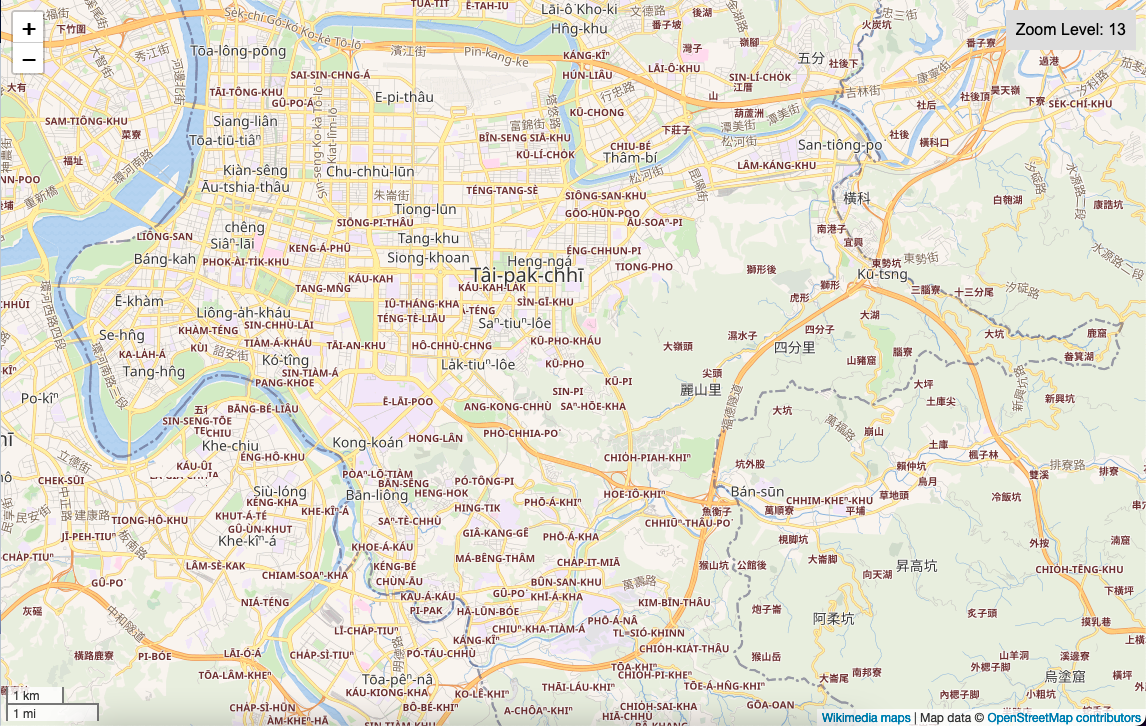
[Wikimedia Map: nan](https://maps.wikimedia.org/?lang=nan#13/25.0237/121.5717)

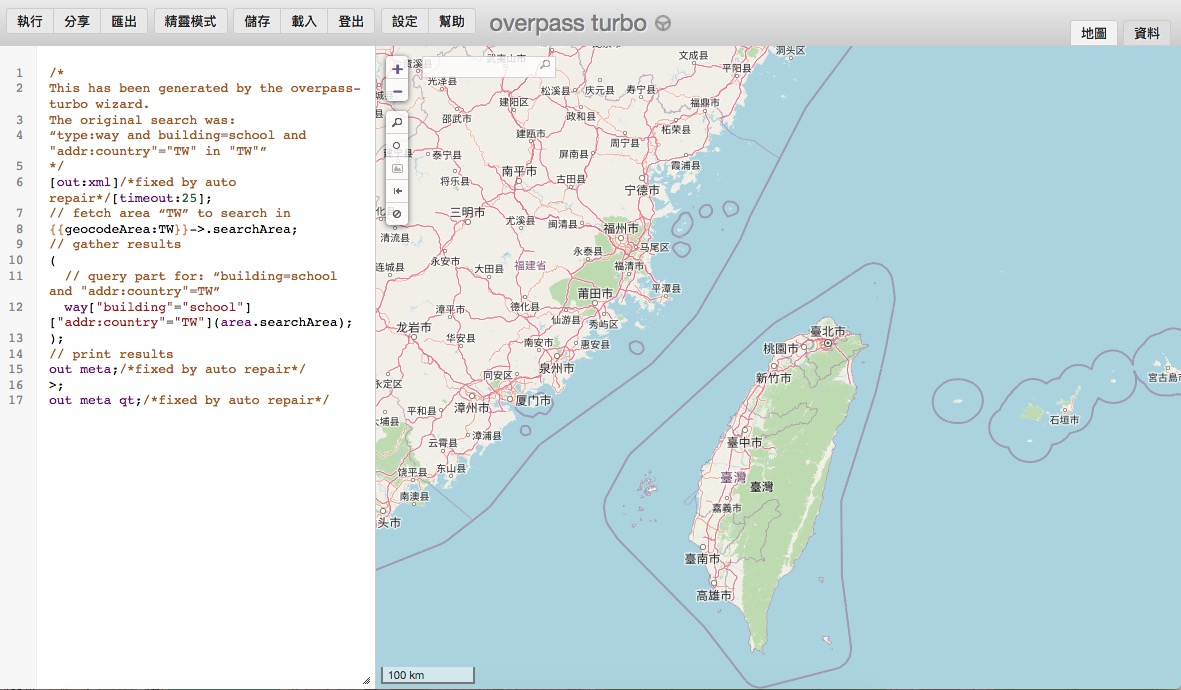

## 來編輯吧！

* 示範繪製區：HOT Tasking Manager [Project 16316](https://tasks.hotosm.org/projects/16316/)
* 相關資料 - 陽明交大工作坊簡報：https://hackmd.io/@osm-tw/HJJqv7HC6?utm_source=preview-mode&utm_medium=rec#/

![HOT Tasking Manager Project](https://hackmd.io/_uploads/SJ_TAE6C6.png)

* [Mapillary學甲街景](https://www.mapillary.com/app/?lat=23.233580728871218&lng=120.18039578896662&z=16.306340199547723&pKey=1878181672565823&focus=photo)

## 運用套件和資料
* 直接用常用的網路套件：requests、json
* Overpass API
* 專用基礎套件：OSMPythonTools、Geopy
* 進階套件：OSMnx
* 地圖呈現套件：folium

## requests、json
* 簡單，只要有架設網路相關套件就能取用 OpenStreetMap
* 難度，需要有基本的網頁知識與 API 概念

## OpenStreetMap 的 API
* OpenStreetMap API
* Overpass API
* 其他第三方 API，例如 Mapbox、Mapillary

In [19]:
# conda install -c conda-forge geopandas

conda install conda-forge/label/cf202003::sparqlwrapper

SyntaxError: invalid syntax (505719054.py, line 3)

In [7]:
import requests
import json


In [8]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["nat_ref"="63"][admin_level=4];
(node["amenity"="restaurant"](area);
 way["amenity"="restaurant"](area);
 rel["amenity"="restaurant"](area);
);
out center;
"""

In [9]:
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [10]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.62.1 084b4234',
 'osm3s': {'timestamp_osm_base': '2024-07-15T13:42:19Z',
  'timestamp_areas_base': '2024-07-15T11:36:15Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 283374379,
   'lat': 25.1064928,
   'lon': 121.5243721,
   'tags': {'addr:city': '台北市',
    'addr:country': 'TW',
    'addr:district': '士林區',
    'addr:housenumber': '5',
    'addr:postcode': '111',
    'addr:street': '德行西路',
    'amenity': 'restaurant',
    'cuisine': 'german',
    'name': '温德德式烘焙餐館',
    'name:en': "Wendel's bakery and bistro",
    'name:zh': '温德德式烘焙餐館',
    'opening_hours': 'Tu-Su 09:00-22:00',
    'phone': '+886 2 2831 4415',
    'shop': 'bakery',
    'wheelchair': 'limited'}},
  {'type': 'node',
   'id': 299002404,
   'lat': 25.0321775,
   'lon': 121.5687012,
   'tags': {'amenity': 'restaurant',
    'cuisine': 'american',
    'name': 

In [16]:
import geopy

from geopy.geocoders import Nominatim

geolocator = Nominatim(timeout=10, user_agent="sinica-intern")

# location = geolocator.geocode('1號, 市府路, 信義區, 臺北市, TW')

#test Chinese address
location = geolocator.geocode('臺北市信義區市府路1號')

print(location)
# 無法跑出來
# https://practicaldatascience.co.uk/data-science/how-to-geocode-and-map-addresses-in-geopy

None


In [13]:
# print(location)

None


In [20]:
geolocator = Nominatim(timeout=100, user_agent="sinica-intern-2024")

location = geolocator.geocode('1號, 市府路, 信義區, 臺北市, TW')

location

Location(1號, 市府路, 西村里, 信義區, 興雅, 臺北市, 110, 臺灣, (25.0374511, 121.5638672, 0.0))

In [21]:
geolocator = Nominatim(timeout=100, user_agent="sinica-intern-2024")

location_sinica = geolocator.geocode('128號, 研究院路二段, 南港區, 臺北市, TW')

print((location_sinica.latitude, location_sinica.longitude))
# https://geopy.readthedocs.io/en/stable/#nominatim

(25.0420109, 121.6166903)


## 臺灣各地地址開放資料

* 臺中市
* 臺北市
* 臺東縣
* 苗栗縣
* 臺南市
* 高雄市
* 新竹市
* 桃園市
* 雲林縣
* 新北市 (處理中)

In [22]:
import numpy as np
import matplotlib.pyplot as plt # 輸出圖表用

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

python(34451) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


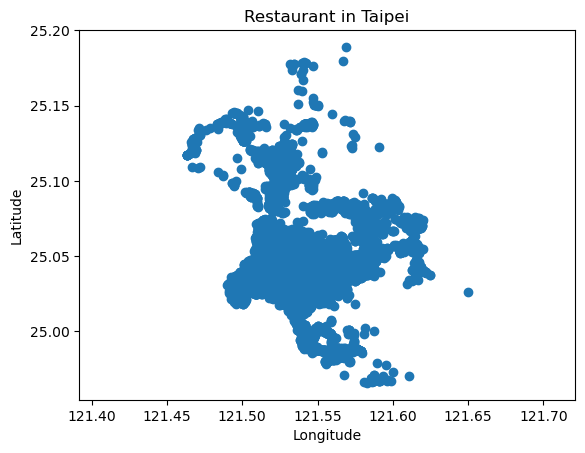

In [23]:
# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Restaurant in Taipei')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

Overpass Turbo 範例：臺北市的餐廳
https://overpass-turbo.eu/s/WDS

匯出存檔為 geojson 檔案，直接取得 GeoPandas 能處理的格式

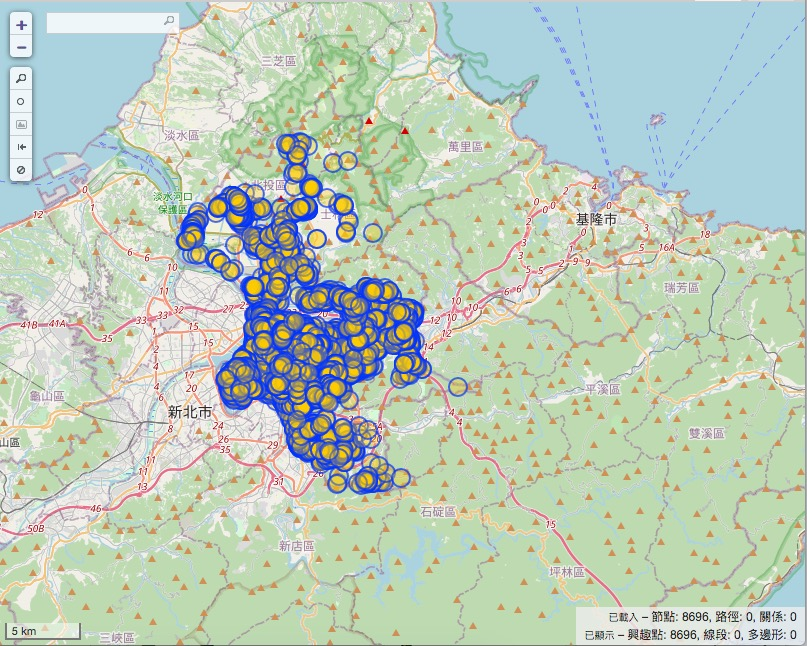

In [ ]:
conda install geopandas --force-reinstall

In [11]:
import folium

m = folium.Map(location=[25.04297, 121.55711], zoom_start = 17)
m

In [12]:
folium.Marker(location=[25.04297, 121.55711], popup="PyData",tooltip="Click").add_to(m)
m

In [13]:
folium.Marker(location=[25.04297, 121.55711], popup="Youreator",tooltip="Click").add_to(m)
m

In [14]:
m.save('index.html')

In [24]:
import geopandas as gpd
gdf = gpd.read_file("restaurant-tpe.geojson")
gdf.head()

id             @id access addr:city addr:country addr:district  \
0  node/283374379  node/283374379   None       台北市           TW           士林區   
1  node/299002404  node/299002404   None      None         None          None   
2  node/469812996  node/469812996   None       臺北市           TW           中正區   
3  node/569950080  node/569950080   None      None         None          None   
4  node/569950081  node/569950081   None      None         None          None   

  addr:floor                addr:full addr:full:en addr:hamlet  ...  \
0       None                     None         None        None  ...   
1       None                     None         None        None  ...   
2          2  10045臺北市中正區重慶南路一段129號2樓         None        None  ...   
3       None                     None         None        None  ...   
4       None                     None         None        None  ...   

  wheelchair:description  wifi wikidata wikipedia                @timestamp  \
0                   None  None     None      None 2021-08-29 09:18:28+00:00   
1                   None  None     None      None 2013-08-04 17:26:22+00:00   
2                   None  None     None      None 2022-05-17 06:58:37+00:00   
3                   None  None     None      None 2009-11-24 11:06:59+00:00   
4                   None  None     None      None 2020-07-08 18:10:11+00:00   

  @version @changeset        @user     @uid                    geometry  
0        7  110404483     Supaplex   274857  POINT (121.52437 25.10649)  
1        6   17217722  Shangkuanlc   975241  POINT (121.56870 25.03218)  
2        9  121082514          林阿凱  7535457  POINT (121.51330 25.04201)  
3        1    3202851      TTaipei   200988  POINT (121.56903 25.02583)  
4        5   87717104   cmi3j89d9o   151425  POINT (121.56918 25.02465)  

[5 rows x 313 columns]

In [33]:
# Select some useful cols and print
cols = ['name', 'name:en', 'cuisine', 'addr:street', 'addr:housenumber', 'takeaway', 'delivery', 'geometry']
# Print only selected cols
gdf[cols].tail(15)

name         name:en         cuisine addr:street  \
10512               秋月日式炸豬排            None  curry;japanese        None   
10513       BANCO棒可 窯烤PIZZA            None         italian       基隆路二段   
10514               艾隆養式麵食館            None            None        None   
10515              Lisa泰式美食            None            None        None   
10516            辣吉點正宗成都串串香            None            None        None   
10517              朝味決湯滷專門店            None            None        None   
10518                   春水堂  Chun Shui Tang            None        None   
10519  Islandwood Breakfast            None            None        None   
10520                  None       Fireweeds            None      同安街28巷   
10521                 純發魯肉飯            None            None        None   
10522                  給力盒子       Get Power            None       漢口街一段   
10523                  越南美食            None            None      和平東路一段   
10524                   品豆漿            None            None      和平東路一段   
10525                巷子龍家常菜            None        regional         四維路   
10526                 富士山の豬  Fujiyama's Pig            None        延平南路   

      addr:housenumber takeaway delivery                    geometry  
10512             None      yes     None  POINT (121.50656 25.02974)  
10513             13-1     None     None  POINT (121.55927 25.03219)  
10514             None     None     None  POINT (121.51641 25.04542)  
10515             None     None     None  POINT (121.51844 25.05982)  
10516             None     None     None  POINT (121.51786 25.05214)  
10517             None     None     None  POINT (121.53186 25.01610)  
10518             None     None     None  POINT (121.55417 25.08419)  
10519             None     None     None  POINT (121.51975 25.04918)  
10520                1     None     None  POINT (121.52164 25.02484)  
10521             None     None     None  POINT (121.61352 25.06909)  
10522               31     None     None  POINT (121.51368 25.04526)  
10523               22     None     None  POINT (121.52363 25.02677)  
10524               18     None     None  POINT (121.52360 25.02676)  
10525               25      yes     None  POINT (121.54819 25.03547)  
10526             36之1     None     None  POINT (121.51071 25.04636)

In [45]:
# plot geojson 

# https://python-visualization.github.io/folium/latest/user_guide/geojson/geopandas_and_geo_interface.html
# https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html

# m = folium.Map([40.7, -74], zoom_start=10, tiles="cartodbpositron")

# folium.GeoJson(boros).add_to(m)

# m

import folium

# prpare base map
restaurant_map = folium.Map([25.04256, 121.61581], zoom_start=17, tiles="openstreetmap")

# Access the centroid attribute of each polygon
gdf["centroid"] = gdf.centroid

# load geojson
folium.GeoJson(gdf).add_to(restaurant_map)

# show map
restaurant_map

/var/folders/1_/dt_mrk5j3jd1vchw4wgm4m9c0000gn/T/ipykernel_20910/2370389885.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.centroid


TypeError: Object of type Timestamp is not JSON serializable

In [46]:
# Select some useful cols and print
cols = ['name', 'name:en', 'cuisine', 'addr:street', 'addr:housenumber', 'takeaway', 'delivery', 'centroid']
# Print only selected cols
gdf[cols].tail(15)

name         name:en         cuisine addr:street  \
10512               秋月日式炸豬排            None  curry;japanese        None   
10513       BANCO棒可 窯烤PIZZA            None         italian       基隆路二段   
10514               艾隆養式麵食館            None            None        None   
10515              Lisa泰式美食            None            None        None   
10516            辣吉點正宗成都串串香            None            None        None   
10517              朝味決湯滷專門店            None            None        None   
10518                   春水堂  Chun Shui Tang            None        None   
10519  Islandwood Breakfast            None            None        None   
10520                  None       Fireweeds            None      同安街28巷   
10521                 純發魯肉飯            None            None        None   
10522                  給力盒子       Get Power            None       漢口街一段   
10523                  越南美食            None            None      和平東路一段   
10524                   品豆漿            None            None      和平東路一段   
10525                巷子龍家常菜            None        regional         四維路   
10526                 富士山の豬  Fujiyama's Pig            None        延平南路   

      addr:housenumber takeaway delivery                    centroid  
10512             None      yes     None  POINT (121.50656 25.02974)  
10513             13-1     None     None  POINT (121.55927 25.03219)  
10514             None     None     None  POINT (121.51641 25.04542)  
10515             None     None     None  POINT (121.51844 25.05982)  
10516             None     None     None  POINT (121.51786 25.05214)  
10517             None     None     None  POINT (121.53186 25.01610)  
10518             None     None     None  POINT (121.55417 25.08419)  
10519             None     None     None  POINT (121.51975 25.04918)  
10520                1     None     None  POINT (121.52164 25.02484)  
10521             None     None     None  POINT (121.61352 25.06909)  
10522               31     None     None  POINT (121.51368 25.04526)  
10523               22     None     None  POINT (121.52363 25.02677)  
10524               18     None     None  POINT (121.52360 25.02676)  
10525               25      yes     None  POINT (121.54819 25.03547)  
10526             36之1     None     None  POINT (121.51071 25.04636)

In [48]:
folium.GeoJson(gdf['centroid'] 
              ).add_to(restaurant_map)

In [49]:
# conda install -c conda-forge geopy

restaurant_map

## osmnx
* 強項為路網分析
* networkx 衍生的套件

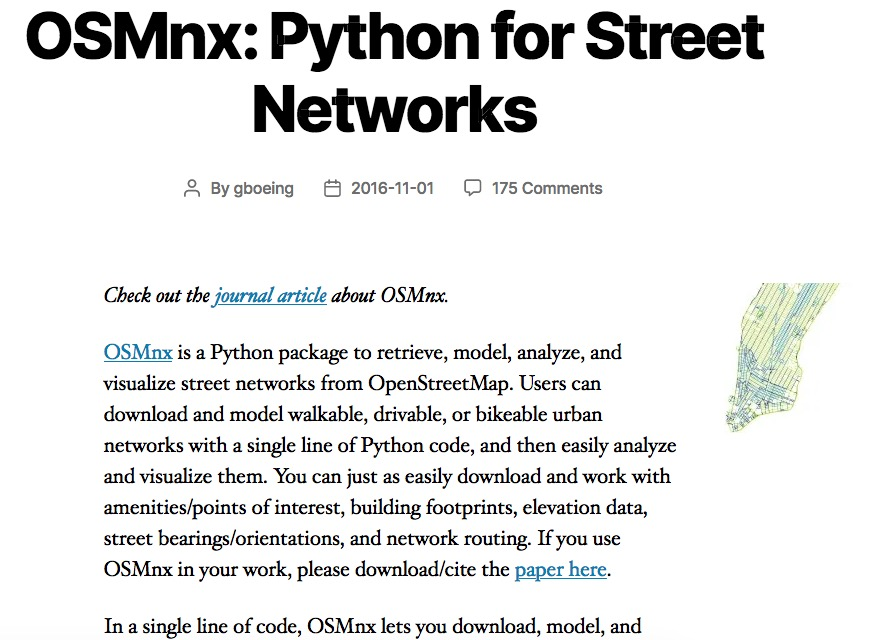

In [51]:
conda install conda-forge::osmnx

python(38635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Channels:
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/homebrew/anaconda3

  added / updated specs:
    - conda-forge::osmnx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    affine-2.3.0               |     pyhd3eb1b0_0          17 KB
    osmnx-1.9.3                |     pyhd8ed1ab_0          82 KB  conda-forge
    rasterio-1.3.10            |  py311hd30b564_0         7.9 MB
    snuggs-1.4.7               |     pyhd3eb1b0_0           9 KB
    ------------------------------------------------------------
                                           Total:         8.0 MB

The following NEW packages will be INSTALLED:

  affine             pkgs/main/noarch::affine-2.3.0-pyhd3eb1b0_0 
  osmnx              conda-forge/noarch::osmnx-1.9.3-pyhd8ed1ab_0 
  rasterio           pkgs/main/osx-arm64::rasterio-1.3.10-py311hd30

In [52]:
import osmnx as ox
import matplotlib.pyplot as plt 
%matplotlib inline

# ox.config(log_console=True, use_cache=True)
# ox.__version__

ox.settings.log_console=True
ox.config(log_console=True, use_cache=True)

python(38671) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/var/folders/1_/dt_mrk5j3jd1vchw4wgm4m9c0000gn/T/ipykernel_20910/3573387634.py:9: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(log_console=True, use_cache=True)


In [56]:
place = "南港區, 臺北市, 臺灣"
# 打"Nangang District, Taipei City, Taiwan"會找到新北市新莊區南港里
G = ox.graph_from_place(place)

In [57]:
ox.stats.basic_stats(G, clean_int_tol=False)
# 傳回基本的統計資訊

{'n': 4127,
 'm': 11394,
 'k_avg': 5.521686455052096,
 'edge_length_total': 628960.4689999997,
 'edge_length_avg': 55.20102413550989,
 'streets_per_node_avg': 3.0273806639205234,
 'streets_per_node_counts': {0: 0,
  1: 654,
  2: 3,
  3: 2068,
  4: 1383,
  5: 17,
  6: 1,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.15846862127453357,
  2: 0.000726920281075842,
  3: 0.5010903804216138,
  4: 0.3351102495759632,
  5: 0.004119214926096438,
  6: 0.000242306760358614,
  7: 0.000242306760358614},
 'intersection_count': 3473,
 'street_length_total': 341509.0269999998,
 'street_segment_count': 6163,
 'street_length_avg': 55.41279036183674,
 'circuity_avg': 1.0999380224232118,
 'self_loop_proportion': 0.0009735518416355671}

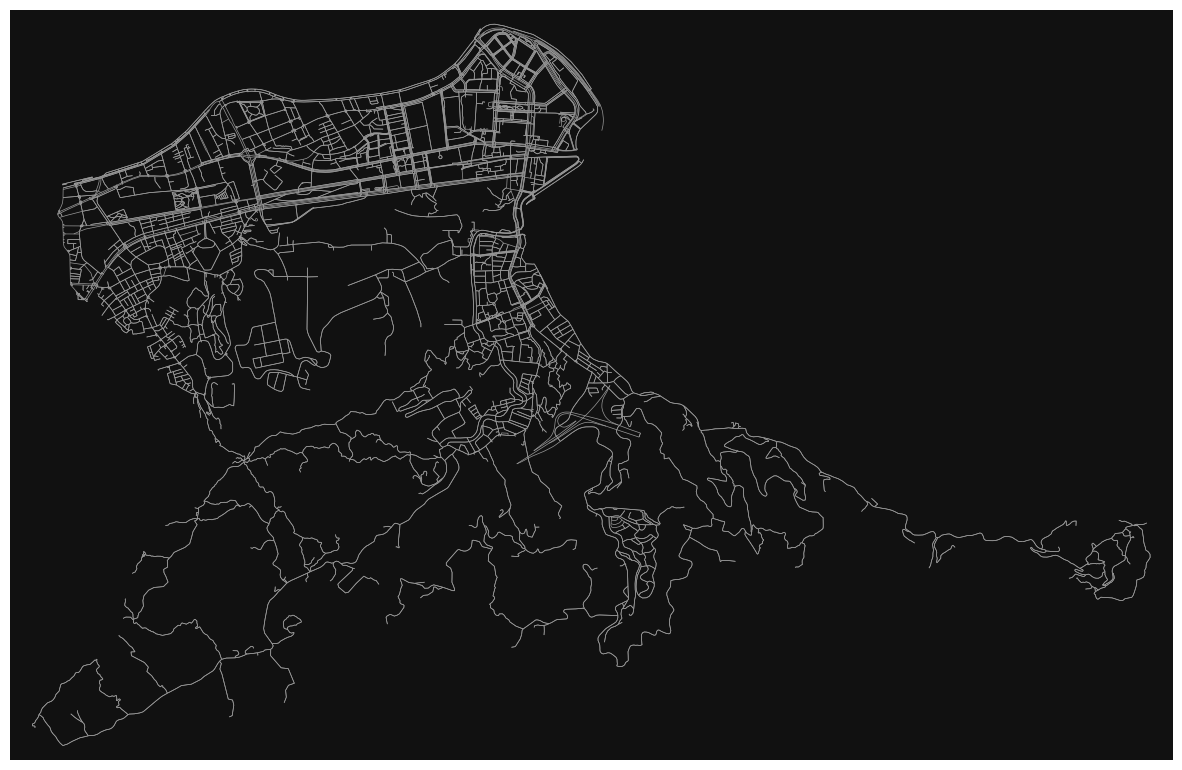

In [58]:
fig, ax = ox.plot_graph(G, figsize=(15, 15), node_size=0, edge_linewidth=0.5)
# 傳回南港區範圍內的道路網

In [59]:
ox.stats.basic_stats(G, area=None, clean_int_tol=None)

#ox.stats.basic_stats(G, area=None, clean_intersects=False, tolerance=15, circuity_dist='gc')
# 傳回基本的統計資訊

{'n': 4127,
 'm': 11394,
 'k_avg': 5.521686455052096,
 'edge_length_total': 628960.4689999997,
 'edge_length_avg': 55.20102413550989,
 'streets_per_node_avg': 3.0273806639205234,
 'streets_per_node_counts': {0: 0,
  1: 654,
  2: 3,
  3: 2068,
  4: 1383,
  5: 17,
  6: 1,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.15846862127453357,
  2: 0.000726920281075842,
  3: 0.5010903804216138,
  4: 0.3351102495759632,
  5: 0.004119214926096438,
  6: 0.000242306760358614,
  7: 0.000242306760358614},
 'intersection_count': 3473,
 'street_length_total': 341509.0269999998,
 'street_segment_count': 6163,
 'street_length_avg': 55.41279036183674,
 'circuity_avg': 1.0999380224232118,
 'self_loop_proportion': 0.0009735518416355671}

In [60]:
area = ox.features.features_from_place(place, tags = {'building': True})
# area = ox.geometries.geometries_from_place(place, tags = {'building': True})
# area = ox.gdf_from_place(place)
# 轉換 place 變成 GeoPandas 能處理的類型
# https://github.com/gboeing/osmnx/issues/526

In [61]:
type(area)
# 發現 area 是屬於 GeoPandas 的 GeoDataFrame 類型物件

geopandas.geodataframe.GeoDataFrame

In [62]:
area
# 傳回南港區範圍的建築清單b

geometry  \
element_type osmid                                                           
node         5867020746                         POINT (121.63825 25.03035)   
way          73186282    POLYGON ((121.61450 25.05759, 121.61524 25.057...   
             73186288    POLYGON ((121.61551 25.05751, 121.61625 25.057...   
             73369283    POLYGON ((121.59267 25.05038, 121.59267 25.050...   
             73567706    POLYGON ((121.61739 25.05749, 121.61739 25.057...   
...                                                                    ...   
relation     11345699    POLYGON ((121.58745 25.05369, 121.58743 25.053...   
             11345700    POLYGON ((121.58730 25.05367, 121.58727 25.053...   
             11345701    POLYGON ((121.58714 25.05365, 121.58712 25.053...   
             12318691    POLYGON ((121.61720 25.04430, 121.61742 25.044...   
             16066283    POLYGON ((121.59635 25.04992, 121.59655 25.049...   

                        amenity     name addr:city addr:country addr:district  \
element_type osmid                                                              
node         5867020746     NaN    魏靜時故居       NaN          NaN           NaN   
way          73186282       NaN   世正南軟大樓       台北市           TW           南港區   
             73186288       NaN   世正經貿大樓       臺北市           TW           南港區   
             73369283       NaN    捷運昆陽站       NaN          NaN           NaN   
             73567706       NaN  世貿南港展覽館       臺北市           TW           南港區   
...                         ...      ...       ...          ...           ...   
relation     11345699       NaN      NaN       NaN          NaN           NaN   
             11345700       NaN      NaN       NaN          NaN           NaN   
             11345701       NaN      NaN       NaN          NaN           NaN   
             12318691       NaN  國際研究生宿舍       NaN          NaN           NaN   
             16066283       NaN      NaN       NaN          NaN           NaN   

                        addr:housenumber addr:postcode addr:street access  \
element_type osmid                                                          
node         5867020746              NaN           NaN         NaN    NaN   
way          73186282                 66           115         三重路    NaN   
             73186288                 66           115         三重路    NaN   
             73369283                NaN           NaN         NaN    NaN   
             73567706                  1           115        經貿二路    NaN   
...                                  ...           ...         ...    ...   
relation     11345699                NaN           NaN         NaN    NaN   
             11345700                NaN           NaN         NaN    NaN   
             11345701                NaN           NaN         NaN    NaN   
             12318691                NaN           NaN         NaN    NaN   
             16066283                NaN           NaN         NaN    NaN   

                         ... social_facility:for contact:facebook roof:shape  \
element_type osmid       ...                                                   
node         5867020746  ...                 NaN              NaN        NaN   
way          73186282    ...                 NaN              NaN        NaN   
             73186288    ...                 NaN              NaN        NaN   
             73369283    ...                 NaN              NaN        NaN   
             73567706    ...                 NaN              NaN        NaN   
...                      ...                 ...              ...        ...   
relation     11345699    ...                 NaN              NaN        NaN   
             11345700    ...                 NaN              NaN        NaN   
             11345701    ...                 NaN              NaN        NaN   
             12318691    ...                 NaN              NaN        NaN   
             16066283    ...       

<Axes: >

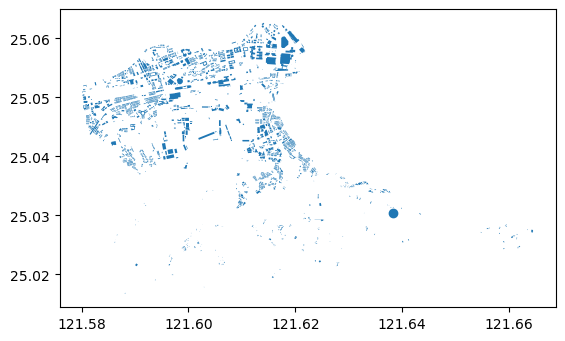

In [63]:
area.plot()
# 用 Matplotlib 畫出南港區範圍內的建築

In [64]:
area['geometry']
# 傳回南港區的 geometry 數值，以及前幾筆構成 polygram 的點經緯度

element_type  osmid     
node          5867020746                           POINT (121.63825 25.03035)
way           73186282      POLYGON ((121.61450 25.05759, 121.61524 25.057...
              73186288      POLYGON ((121.61551 25.05751, 121.61625 25.057...
              73369283      POLYGON ((121.59267 25.05038, 121.59267 25.050...
              73567706      POLYGON ((121.61739 25.05749, 121.61739 25.057...
                                                  ...                        
relation      11345699      POLYGON ((121.58745 25.05369, 121.58743 25.053...
              11345700      POLYGON ((121.58730 25.05367, 121.58727 25.053...
              11345701      POLYGON ((121.58714 25.05365, 121.58712 25.053...
              12318691      POLYGON ((121.61720 25.04430, 121.61742 25.044...
              16066283      POLYGON ((121.59635 25.04992, 121.59655 25.049...
Name: geometry, Length: 3681, dtype: geometry

In [65]:
buildings = ox.geometries_from_place(place, tags = {'building': True})
# buildings = ox.footprints_from_place(place)
# https://github.com/gboeing/osmnx/issues/526

/var/folders/1_/dt_mrk5j3jd1vchw4wgm4m9c0000gn/T/ipykernel_20910/3370684494.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings = ox.geometries_from_place(place, tags = {'building': True})


In [66]:
len(buildings)
# 回傳建築物數量

3681

In [67]:
# 截取餐聽
restaurants = ox.geometries_from_place(place, tags = {'amenity':'restaurant'})

# 南港區有幾間餐廳?
len(restaurants)

# tags = {'amenity':True, 'landuse':['retail','commercial'], 'highway':'bus_stop'}
# gdf = ox.geometries_from_place(place, tags)

/var/folders/1_/dt_mrk5j3jd1vchw4wgm4m9c0000gn/T/ipykernel_20910/147130068.py:2: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  restaurants = ox.geometries_from_place(place, tags = {'amenity':'restaurant'})


412

In [68]:
# 有那些欄位
restaurants.columns

Index(['amenity', 'brand', 'name', 'name:en', 'name:ja', 'name:zh',
       'toilets:wheelchair', 'wheelchair', 'geometry', 'diet:vegan',
       'religion', 'addr:city', 'addr:country', 'addr:district',
       'addr:housenumber', 'addr:postcode', 'addr:street', 'disused:alt_name',
       'disused:amenity', 'disused:cuisine', 'disused:diet:vegan',
       'disused:diet:vegetarian', 'disused:name', 'disused:phone',
       'contact:facebook', 'cuisine', 'delivery', 'takeaway', 'brand:en',
       'brand:ja', 'brand:zh', 'branch', 'cuisine:zh', 'disused:name:en',
       'disused:name:zh', 'phone', 'opening_hours', 'brand:wikidata',
       'capacity', 'level', 'smoking', 'website', 'name:zh-Hans',
       'name:zh-Hant', 'internet_access', 'diet:vegetarian', 'addr:full',
       'brand:wikipedia', 'addr:floor', 'addr:housename', 'addr:housename:en',
       'layer', 'note', 'name:hak', 'name:nan', 'name:nan-HJ', 'name:nan-POJ',
       'name:nan-TL', 'description', 'air_conditioning', 'alt_name:ja

## Work Directly with planet data

* [The Whole Planet File](https://planet.openstreetmap.org/)
* [XML](https://planet.openstreetmap.org/planet/planet-latest.osm.bz2): 128GB
* [PPB](https://planet.openstreetmap.org/pbf/planet-latest.osm.pbf): 70GB

## Country specific planet data

* [Geofabrik](http://geofabrik.de/data/download.html)：分國家
* [BBbike](https://download.bbbike.org/osm/)：各大城市、客製化輸出範圍

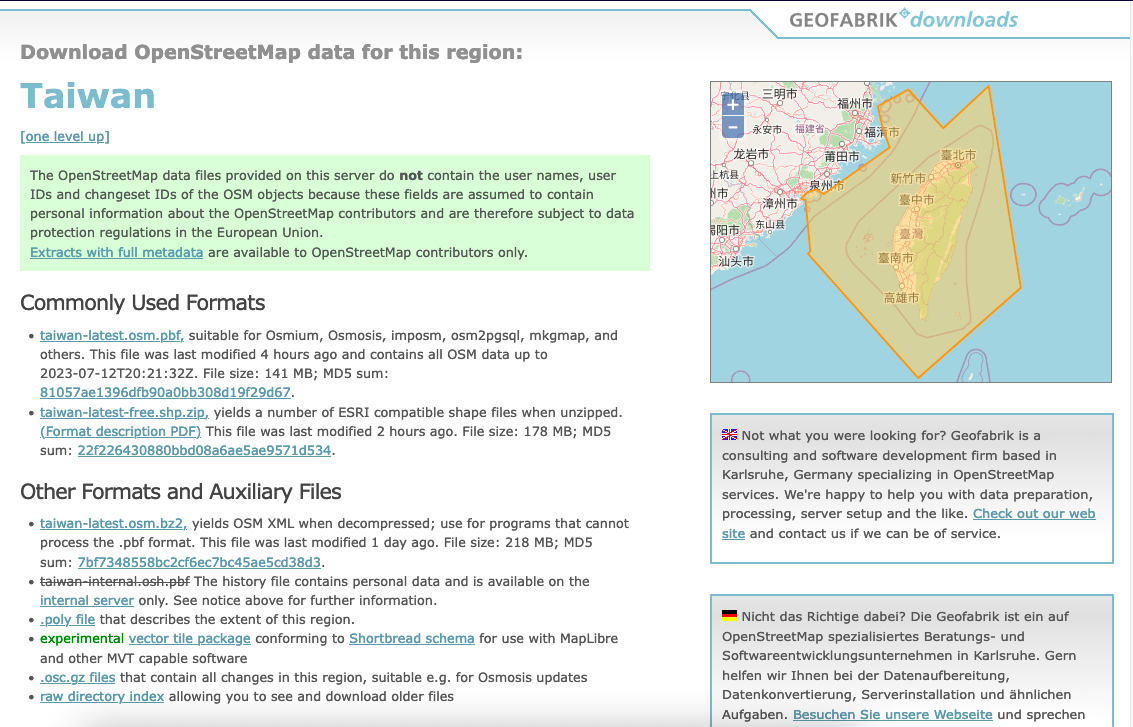

## ommand line tool: osmium

* [osmium](https://osmcode.org/osmium-tool/index.html)
* 有 command line、Python Package

Object `osmium` not found.


## osmium

命行列輸入下一行查看台灣資料狀況：

    osmium fileinfo taiwan-latest.osm.pbf



輸入下一行查看進階資訊：

    osmium fileinfo -e taiwan-latest.osm.pbf




列出台灣村里關係用到的標籤組合
    
    osmium tags-filter taiwan-latest.osm.pbf r/boundary=administrative | osmium tags-filter r/admin_level=9 -o village.osm.pbf
    
    osmium tags-filter -f pbf taiwan-latest.osm.pbf - r/boundary=administrative | osmium 'tags-filter' -F=pbf -R -o village.osm.pbf  - 'r/admin_level=9'

    osmium tags-count village.osm.pbf


    osmium tags-filter taiwan-latest.osm.pbf r/type=waterway -o Taiwan-river.osm.pbf

    osmium tags-count -t relation Taiwan-river.osm.pbf type=waterway



    osmium tags-filter -f pbf taiwan-latest.osm.pbf shop=convenience | osmium tags-count -F pbf - 'name=*'


In [ ]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT DISTINCT ?item ?name ?Hu ?OpenStreetMap ?Coor WHERE {
  ?item wdt:P31 wd:Q705296;
    wdt:P131 wd:Q1867.
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "[AUTO_LANGUAGE],zh".
    ?item rdfs:label ?name.
  }
  FILTER NOT EXISTS { ?item wdt:P576 ?end. }  
  OPTIONAL { ?item wdt:P5020 ?Hu. }
  OPTIONAL { ?item wdt:P402 ?OpenStreetMap. }

}
ORDER BY (?itemLabel)"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result)


# 謝謝大家

QA

8/3 COSCUP 2024 OpenStreetMap x Wikidata 開放內容議程軌
下次 OpenStreetMap x Wikidata 月聚：2024 8/5

# 參考資料

Reveal.js
* [Reveal.js](https://revealjs.com/)

Overpass API
* https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0

OSMnx:
* [OSMnx Example](https://github.com/gboeing/osmnx-examples/blob/master/notebooks)：[路網分析](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/06-example-osmnx-networkx.ipynb)
* [赫爾辛基大學 Geo-Python-AutoGIS 課程-Retrieving OpenStreetMap data](https://automating-gis-processes.github.io/2017/lessons/L7/retrieve-osm-data.html)
* [OSMnx 說明文件](https://osmnx.readthedocs.io/en/stable/osmnx.html)
* [Day20 OSMnx應用 ](https://ithelp.ithome.com.tw/articles/10207981?sc=iThelpR)

IPython:
* http://darribas.org/gds15/content/labs/lab_03.html
* https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

Folium:
* https://www.youtube.com/watch?v=QpBmO35pmVE
* https://github.com/tsaisunghao/Geography/blob/master/EarthquakeMap/geomapping.ipynb
* https://github.com/victorgau/wzu20180122/blob/master/%E5%9C%B0%E5%9C%96%E7%AF%84%E4%BE%8B/%E7%94%A8%20folium%20%E7%95%AB%E5%9C%B0%E5%9C%96.ipynb
* https://github.com/gotoariel/folium-demo/blob/master/demo/demo.ipynb